In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [27]:
df = pd.read_csv('../data/cleaned_data/regression/features_extractor_sample_rate_001_version_1.csv')

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,demand,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,wday_sin,wday_cos,month_sin,month_cos
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1894,4,2016-04-05,11610,Tuesday,4,4,2016,NaN,NaN,NaN,NaN,1,1,1,8.26,-0.433884,-0.900969,0.866025,-0.5
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1894,0,2016-04-05,11610,Tuesday,4,4,2016,NaN,NaN,NaN,NaN,1,1,1,3.97,-0.433884,-0.900969,0.866025,-0.5
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,1894,0,2016-04-05,11610,Tuesday,4,4,2016,NaN,NaN,NaN,NaN,1,1,1,2.97,-0.433884,-0.900969,0.866025,-0.5
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1894,3,2016-04-05,11610,Tuesday,4,4,2016,NaN,NaN,NaN,NaN,1,1,1,4.64,-0.433884,-0.900969,0.866025,-0.5
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1894,1,2016-04-05,11610,Tuesday,4,4,2016,NaN,NaN,NaN,NaN,1,1,1,2.88,-0.433884,-0.900969,0.866025,-0.5


# Analysing Target 'Demand' 

In [30]:
df['demand'].describe()

count    609800.000000
mean          1.396584
std           3.619642
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         204.000000
Name: demand, dtype: float64

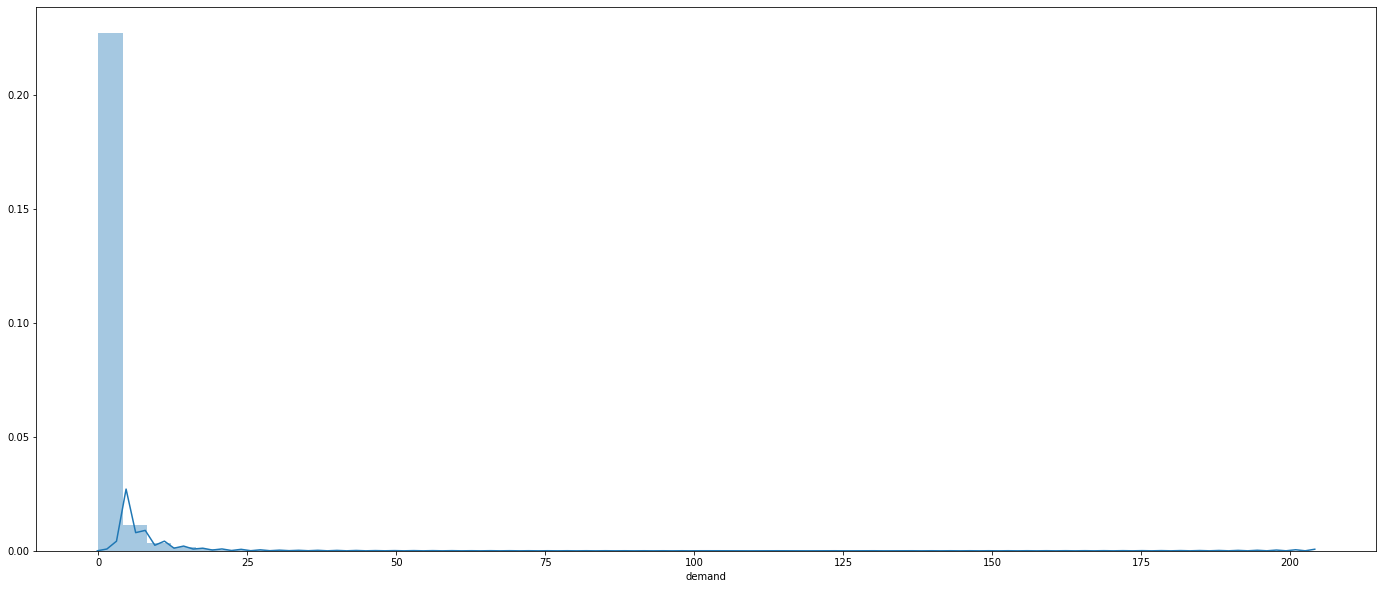

In [59]:
plt.figure(figsize=(24, 10))

sns.distplot(df['demand'])

plt.show()

In [61]:
print("Skewness: %f" % df['demand'].skew())
print("Kurtosis: %f" % df['demand'].kurt())

Skewness: 10.046405
Kurtosis: 200.776847


# Zero Demand Items

In [126]:
days_to_consider = 10
last_day = max(df['d'])

df_recent = df[df['d'] > last_day - days_to_consider]

In [127]:
df_recent.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,demand,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,wday_sin,wday_cos,month_sin,month_cos,log_demand
304900,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1904,1,2016-04-15,11611,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,1,1,8.38,-2.449294e-16,1.0,0.866025,-0.5,0.000000
304901,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1904,0,2016-04-15,11611,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,1,1,3.97,-2.449294e-16,1.0,0.866025,-0.5,0.000000
304902,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,1904,2,2016-04-15,11611,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,1,1,2.97,-2.449294e-16,1.0,0.866025,-0.5,0.693147
304903,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1904,1,2016-04-15,11611,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,1,1,4.64,-2.449294e-16,1.0,0.866025,-0.5,0.000000
304904,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1904,2,2016-04-15,11611,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,1,1,2.88,-2.449294e-16,1.0,0.866025,-0.5,0.693147


In [151]:
weights = df_recent.groupby('id')['demand'].agg('sum').reset_index()

In [152]:
sell_price_recent = df_last_n_days.groupby('id')['sell_price'].mean().reset_index()

In [153]:
weights['weight'] = weights['demand'] * sell_price_recent['sell_price']

In [154]:
weights

,id,demand,weight
0,FOODS_1_001_CA_1_validation,10,22.40
1,FOODS_1_001_CA_2_validation,25,56.00
2,FOODS_1_001_CA_3_validation,14,31.36
3,FOODS_1_001_CA_4_validation,5,11.20
4,FOODS_1_001_TX_1_validation,0,0.00
...,...,...,...
30485,HOUSEHOLD_2_516_TX_2_validation,3,17.82
30486,HOUSEHOLD_2_516_TX_3_validation,0,0.00
30487,HOUSEHOLD_2_516_WI_1_validation,1,5.94
30488,HOUSEHOLD_2_516_WI_2_validation,1,5.94


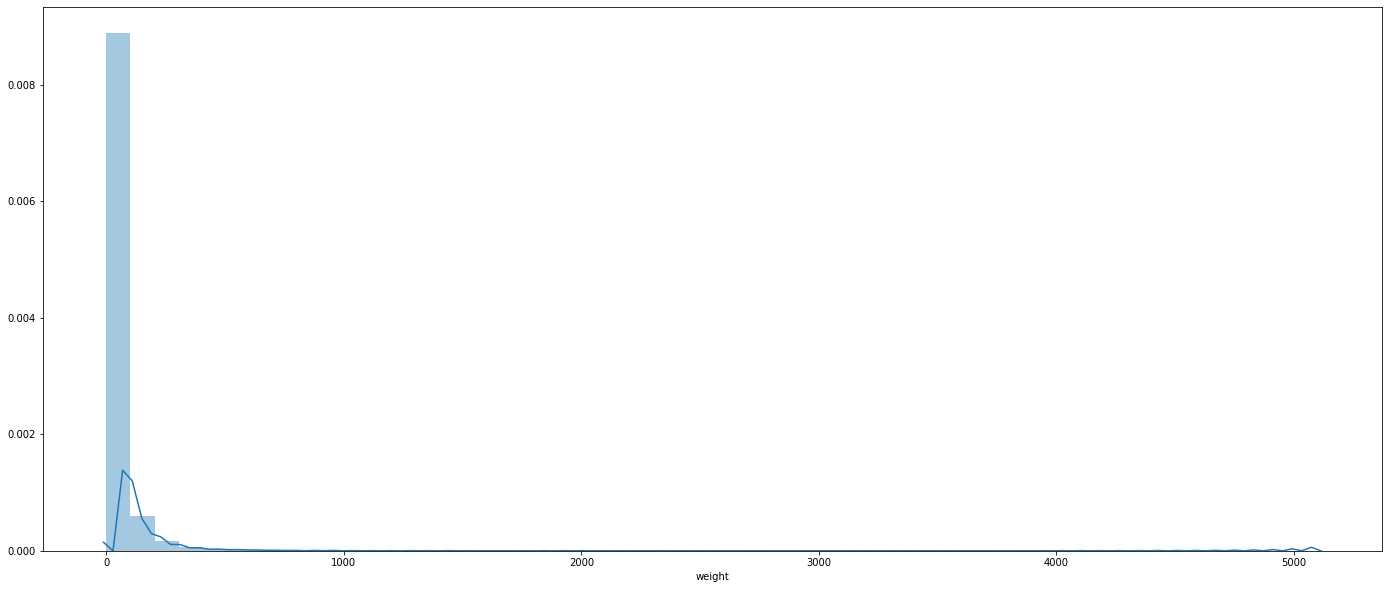

In [156]:
plt.figure(figsize=(24, 10))

sns.distplot(weights['weight'])

plt.show()

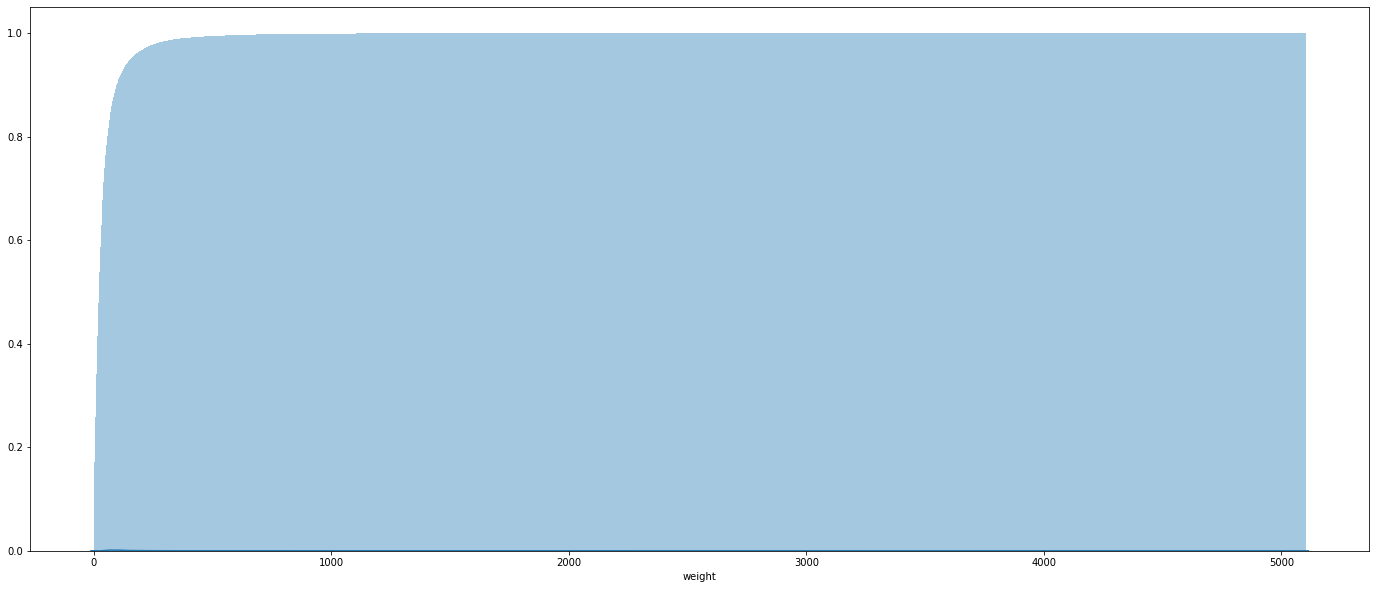

In [172]:
plt.figure(figsize=(24, 10))

kwargs = {'cumulative': True}
sns.distplot(weights['weight'], bins=5000, hist_kws=kwargs)

plt.show()